Analysis to calculate the Green-Kubo conductivity of molten NaCl

Assumes the path to PyLAT/src has been added to PYTHONPATH

# Import Classes

import and initialize required classes for calculations

In [1]:
from getAtomCharges import getatomcharges
from calcCond import calcCond    


gc = getatomcharges()
cc = calcCond()

# Define input 
input for Green-Kubo conductivity calculations

In [2]:
output = {}
datfilename = 'mol.data'
trjfilename=['mol.lammpstrj']
logfilename='log.lammps'
temp=1300
nummoltype=[864,864] #number of each molecule type
moltypel=['Na','Cl'] #list of all molecule types
moltype = []
for i in range(0,len(moltypel)):
    for j in range(0,nummoltype[i]):
        moltype.append(int(i))
verb=2
GKC_skip=0
GKC_Tolerance=0.001
GKC_J_Output=False

# Preliminary Calculations
Preliminary calculations for GKC calculation

In [3]:
output['Conductivity'] = {}
output['Conductivity']['units'] = 'S/m'
n = gc.findnumatoms(datfilename)
(molcharges, atomcharges,n) = gc.getmolcharges(datfilename,n)

# Property Calculations
Calculation of Green-Kubo conductivity

In [4]:
output = cc.calcConductivity(molcharges, trjfilename, logfilename, datfilename, temp, output, moltype, moltypel,verb,GKC_skip,GKC_Tolerance,GKC_J_Output)

beginning COM velocity calculation
COM velocity calculation 47.10% complete

# Plot Cumulative Integral

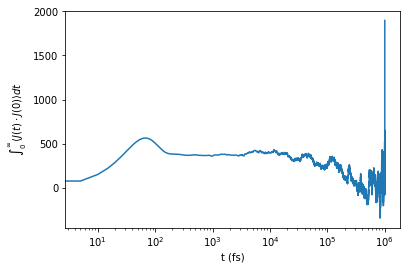

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

Cumulative_Int = output['Conductivity']['GK_Integral']
time = output['Conductivity']['Time']

plt.xscale('log')
plt.xlabel('t (fs)')
plt.ylabel(r'$\int_{0}^{\infty}\langle J(t)\cdot J(0)\rangle dt$')
plt.plot(time,Cumulative_Int)

# Final Values

In [6]:
print('Total Conductivity: {} {}'.format(output['Conductivity']['Green_Kubo'],output['Conductivity']['units']))
print('Contrinution of Na: {} {}'.format(output['Conductivity']['Green_Kubo_Na'],output['Conductivity']['units']))
print('Contrinution of Cl: {} {}'.format(output['Conductivity']['Green_Kubo_Cl'],output['Conductivity']['units']))

Total Conductivity: 395.711812212 S/m
Contrinution of Na: 240.048777457 S/m
Contrinution of Cl: 155.663034755 S/m
